In [ ]:
#download data
from keras.datasets import cifar10

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
from keras.utils import to_categorical
#normalize data, 255 is a max value a pixel can take in an RGB image
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
#DBN Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
#images are 32x32 pixels, RGB has 3 color channels
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#reshape 2d output to 1d vector
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
#loss function
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20,
                    validation_data=(x_test, y_test))


Epoch 1/20
391/391 [==============================] - 79s 200ms/step - loss: 1.5879 - accuracy: 0.4239 - val_loss: 1.2750 - val_accuracy: 0.5483
Epoch 2/20
391/391 [==============================] - 80s 205ms/step - loss: 1.2222 - accuracy: 0.5673 - val_loss: 1.1000 - val_accuracy: 0.6213
Epoch 3/20
391/391 [==============================] - 77s 197ms/step - loss: 1.0708 - accuracy: 0.6250 - val_loss: 0.9849 - val_accuracy: 0.6617
Epoch 4/20
391/391 [==============================] - 78s 199ms/step - loss: 0.9729 - accuracy: 0.6557 - val_loss: 0.9494 - val_accuracy: 0.6662
Epoch 5/20
391/391 [==============================] - 79s 203ms/step - loss: 0.9044 - accuracy: 0.6866 - val_loss: 0.8744 - val_accuracy: 0.6967
Epoch 6/20
391/391 [==============================] - 78s 198ms/step - loss: 0.8430 - accuracy: 0.7034 - val_loss: 0.8440 - val_accuracy: 0.7100
Epoch 7/20
391/391 [==============================] - 77s 197ms/step - loss: 0.7753 - accuracy: 0.7274 - val_loss: 0.8122 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')



313/313 [==============================] - 5s 16ms/step - loss: 0.8933 - accuracy: 0.7477
Test accuracy: 0.7476999759674072


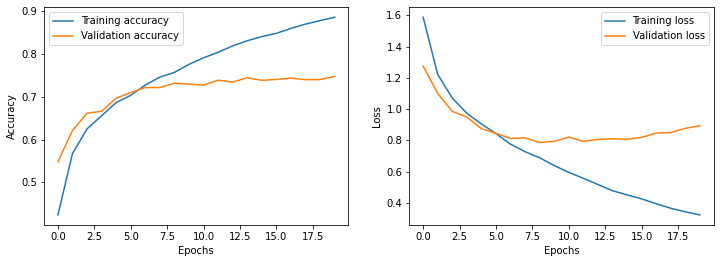

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
